In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
from math import pi

In [4]:
def lorentz(x, y0, amp, cen, wid):
    return y0 + (amp)*(wid/((x-cen)**2 + wid**2))

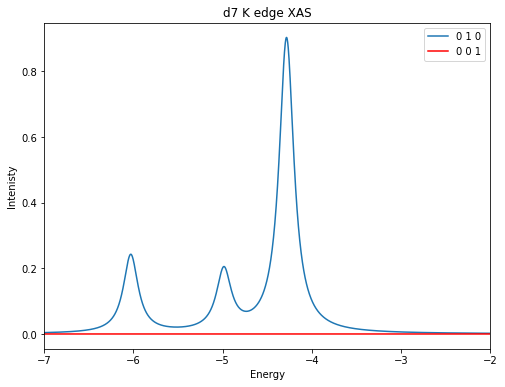

In [47]:
nedos = 10000
xdata = np.linspace(-12,18,nedos)
ydata010 = np.zeros(nedos)
ydata001 = np.zeros(nedos)
with open('./4h_k_010.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        ydata010 += lorentz(xdata,0,i,p,0.1)
        
with open('./4h_k_001.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        ydata001 += lorentz(xdata,0,i,p,0.1)

plt.figure(figsize=(8,6))
plt.plot(xdata,ydata010)
plt.plot(xdata,ydata001,'red')
plt.legend(['0 1 0','0 0 1'])
plt.title("d6 K edge XAS")
plt.ylabel("Intenisty")
plt.xlabel("Energy")
plt.xlim([-7, -2])
plt.show()

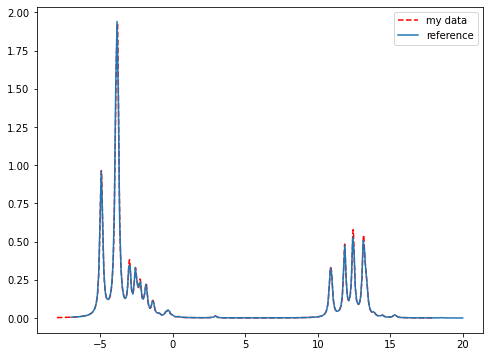

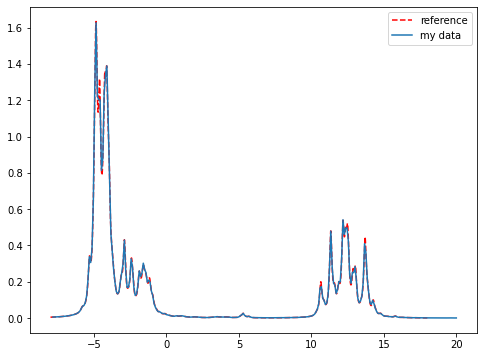

In [6]:
import json
d = json.load(open('2-holes-1-edge-y.json'))
plt.figure(figsize=(8,6))
plt.plot(xdata,ydata010,'red',linestyle='--')
plt.plot(d['omega'],d['Intensity'])
plt.legend(['my data','reference'])

d = json.load(open('3-holes-1-edge-z.json'))
plt.figure(figsize=(8,6))
plt.plot(xdata,ydata001,'red',linestyle='--')
plt.plot(d['omega'],d['Intensity'])
plt.legend(['reference','my data'])

In [277]:
# Plotting linear combination of Nickelate (d9 + d8 S=0 + d8 S=1)
# Parameters Used here: SO -> 11.5 eV
# Frontier Figure 1, includes d9, d8 High Spin, d8 Low spin
nedos = 1000
x = np.linspace(-20,20,nedos)
d9a = np.zeros(nedos)
d9c = np.zeros(nedos)
d8HSa = np.zeros(nedos)
d8HSc = np.zeros(nedos)
d8LSa = np.zeros(nedos)
d8LSc = np.zeros(nedos)
d8HSen = 5.78012
d8LSen = 4.45975
with open('./M_d9a.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        d9a += lorentz(x,0,i,p,0.1)

with open('./M_d9c.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        d9c += lorentz(x,0,i,0.1)

with open('./M_d8HSa.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        d8HSa += lorentz(x,0,i,p+d8HSen,0.1)

with open('./M_d8HSc.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        d8HSc += lorentz(x,0,i,p+d8HSen,0.1)

with open('./M_d8LSa.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        d8LSa += lorentz(x,0,i,p+d8LSen,0.1)

with open('./M_d8LSc.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        d8LSc += lorentz(x,0,i,p+d8LSen,0.1)

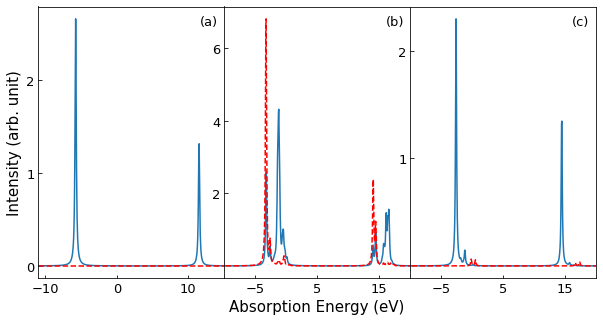

In [389]:
# Plotting linear combination of Nickelate (d9 + d8 S=0 + d8 S=1)
# Parameters Used here: SO -> 11.5 eV

fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(1,3,hspace=0,wspace=0)
axs = gs.subplots(sharex=False,sharey=False)
lw = 1.5
axs[0].plot(x,d9a,linewidth=lw)
axs[0].plot(x,d9c,color="red",linestyle="dashed",linewidth=lw)
axs[0].set_xlim([-11,15])
axs[0].set_xticks(range(-10, 11, 10))
axs[0].set_yticks(range(0, 3, 1))
axs[1].plot(x,d8HSa,linewidth=lw)
axs[1].plot(x,d8HSc,color="red",linestyle="dashed",linewidth=lw)
axs[1].set_xticks(range(-5, 25, 10))
axs[1].set_yticks(range(2, 7, 2))
axs[1].set_xlim([-10,20])
axs[2].plot(x,d8LSa,linewidth=lw)
axs[2].plot(x,d8LSc,color="red",linestyle="dashed",linewidth=lw)
axs[2].set_xlim([-10,20])
axs[2].set_xticks(range(-5, 25, 10))
axs[2].set_yticks(range(1, 3, 1))
axs[1].set_xlabel("Absorption Energy (eV)",fontsize=15)
axs[0].set_ylabel("Intensity (arb. unit)",fontsize=15)
plt.rc('font', size=13)   
axs[0].annotate("(a)", xy=(0.87, 0.93), xycoords="axes fraction")
axs[1].annotate("(b)", xy=(0.87, 0.93), xycoords="axes fraction")
axs[2].annotate("(c)", xy=(0.87, 0.93), xycoords="axes fraction")
for i in range(0,3):
    axs[i].tick_params(axis="x",direction="in")
    axs[i].tick_params(axis="y",direction="in")
plt.savefig('/Users/seanhsu/Desktop/School/Research/Abstracts/E. Been 2021 Frontier/1siteud.eps', format='eps')

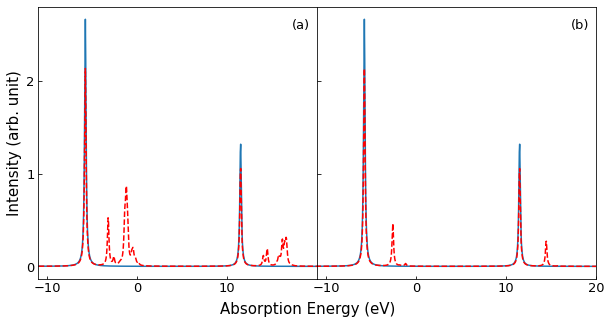

In [395]:
fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(1,2,hspace=0,wspace=0)
axs = gs.subplots(sharex=False,sharey=True)
d = 0
axs[0].plot(x,d9a*(1-d)+d8HSa*d,linewidth=lw)
axs[1].plot(x,d9a*(1-d)+d8LSa*d,linewidth=lw)
d = 0.2
axs[0].plot(x,d9a*(1-d)+d8HSa*d,color="red",linestyle="dashed",linewidth=lw)
axs[1].plot(x,d9a*(1-d)+d8LSa*d,color="red",linestyle="dashed",linewidth=lw)
for i in range(0,2):
    axs[i].tick_params(axis="x",direction="in")
    axs[i].tick_params(axis="y",direction="in")
axs[0].set_xlim([-11,20])
axs[1].set_xlim([-11,20])
axs[0].set_xticks(range(-10,20,10))
axs[1].set_xticks(range(-10,21,10))
axs[0].set_yticks(range(0,3,1))
fig.text(0.5,0.04, "Absorption Energy (eV)",ha="center",va="center",fontsize=15)
axs[0].set_ylabel("Intensity (arb. unit)",fontsize=15)
axs[0].annotate("(a)", xy=(0.91, 0.92), xycoords="axes fraction")
axs[1].annotate("(b)", xy=(0.91, 0.92), xycoords="axes fraction")
plt.savefig('/Users/seanhsu/Desktop/School/Research/Abstracts/E. Been 2021 Frontier/1sitedoped.eps', format='eps')